In [548]:
import pandas as pd
import numpy as np
from numpy import sort

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

import seaborn as sn
import matplotlib.pyplot as plt

import xgboost as xgb
import os

In [549]:
DATA_PATH = 'data'

In [550]:
df = pd.read_csv(os.path.join(DATA_PATH, 'vas_rc_data2.csv'))
df_train = df[df['TARGET_MONTH'] != '2021-01-01']
df_test = df[df['TARGET_MONTH'] == '2021-01-01']

In [551]:
for column in df.columns.to_list():
    print(f"'{column}',")

'MOBILE',
'TARGET_MONTH',
'TOTAL_MONTH',
'TPV_6M',
'TPV_1M',
'TS',
'FREQ_6M',
'FREQ_1M',
'COVER_DAY_6M',
'COVER_DAY_1M',
'PT_VOICE_FREQ_6M',
'PT_FIX_SPEED_NS_FREQ_6M',
'PT_FIX_SPEED_UL_FREQ_6M',
'PT_FULL_SPEED_NS_FREQ_6M',
'PT_BURST_SPEED_FREQ_6M',
'PT_BUNDLE_APP_FREQ_6M',
'PT_OTHER_FREQ_6M',
'PT_VOICE_FREQ_1M',
'PT_FIX_SPEED_NS_FREQ_1M',
'PT_FIX_SPEED_UL_FREQ_1M',
'PT_FULL_SPEED_NS_FREQ_1M',
'PT_BURST_SPEED_FREQ_1M',
'PT_BUNDLE_APP_FREQ_1M',
'PT_VOICE_COVER_6M',
'PT_FIX_SPEED_NS_COVER_6M',
'PT_FIX_SPEED_UL_COVER_6M',
'PT_FULL_SPEED_NS_COVER_6M',
'PT_BURST_SPEED_COVER_6M',
'PT_BUNDLE_APP_COVER_6M',
'PT_OTHER_COVER_6M',
'PT_VOICE_COVER_1M',
'PT_FIX_SPEED_NS_COVER_1M',
'PT_FIX_SPEED_UL_COVER_1M',
'PT_FULL_SPEED_NS_COVER_1M',
'PT_BURST_SPEED_COVER_1M',
'PT_BUNDLE_APP_COVER_1M',
'PT_OTHER_COVER_1M',
'V_1D_FREQ_6M',
'V_2D_FREQ_6M',
'V_3D_FREQ_6M',
'V_5D_FREQ_6M',
'V_7D_FREQ_6M',
'V_8D_FREQ_6M',
'V_10D_FREQ_6M',
'V_15D_FREQ_6M',
'V_30D_FREQ_6M',
'V_90D_FREQ_6M',
'V_180D_FREQ_6M',
'V_OTHER_FR

In [552]:
# X = df.drop(['MOBILE','RC_FLAG','TARGET_MONTH'],axis=1)
X = df[[
    'TS',
#     'TOTAL_MONTH',
    # 6 MONTH
    'TPV_6M',
#     'FREQ_6M',
    'COVER_DAY_6M',
#     'PT_VOICE_FREQ_6M',
#     'PT_FIX_SPEED_NS_FREQ_6M',
#     'PT_FIX_SPEED_UL_FREQ_6M',
#     'PT_FULL_SPEED_NS_FREQ_6M',
#     'PT_BURST_SPEED_FREQ_6M',
#     'PT_BUNDLE_APP_FREQ_6M',
#     'PT_OTHER_FREQ_6M',
#     'PT_VOICE_COVER_6M',
    'PT_FIX_SPEED_NS_COVER_6M',
    'PT_FIX_SPEED_UL_COVER_6M',
#     'PT_FULL_SPEED_NS_COVER_6M',
    'PT_BURST_SPEED_COVER_6M',
#     'PT_BUNDLE_APP_COVER_6M',
    'PT_OTHER_COVER_6M',
    
    # 1 MONTH
#     'TPV_1M',
#     'FREQ_1M',
#     'COVER_DAY_1M',
#     'PT_VOICE_FREQ_1M',
#     'PT_FIX_SPEED_NS_FREQ_1M',
#     'PT_FIX_SPEED_UL_FREQ_1M',
#     'PT_FULL_SPEED_NS_FREQ_1M',
#     'PT_BURST_SPEED_FREQ_1M',
#     'PT_BUNDLE_APP_FREQ_1M',
#     'V_OTHER_FREQ_1M',
#     'PT_VOICE_COVER_1M',
#     'PT_FIX_SPEED_NS_COVER_1M',
#     'PT_FIX_SPEED_UL_COVER_1M',
#     'PT_FULL_SPEED_NS_COVER_1M',
#     'PT_BURST_SPEED_COVER_1M',
#     'PT_BUNDLE_APP_COVER_1M',
#     'PT_OTHER_COVER_1M',
    
]]
y = df[['RC_FLAG']]

In [553]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.30,
                                                    random_state=42)

In [554]:
# fit model no training data
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

/opt/conda/envs/python36_prod/lib/python3.6/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/conda/envs/python36_prod/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/envs/python36_prod/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

[13:46:53] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)

In [555]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [556]:
acc = accuracy_score(y_test, predictions)
f1_acc = f1_score(y_test, predictions)

In [557]:
print('ACCURACY :', acc)
print('F1 SCORE :', f1_acc)

ACCURACY : 0.7373888776359913
F1 SCORE : 0.7313004591698099


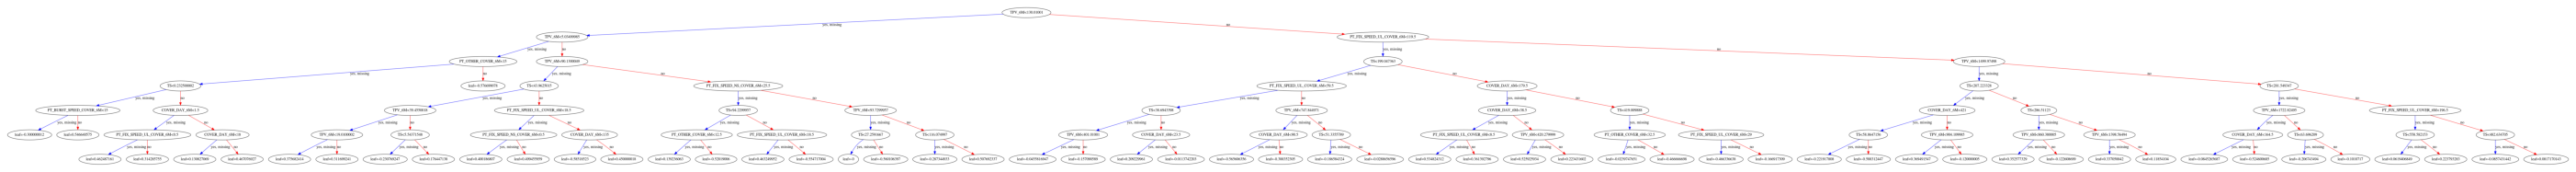

In [558]:
import matplotlib.pyplot as plt

xgb.plot_tree(model,num_trees=0)
plt.rcParams['figure.figsize'] = [50, 25]
plt.show()

In [559]:
importances = list(zip(model.feature_importances_, X_train))
importances.sort(reverse=True)
for item in importances:
    print(item[1], item[0])

TPV_6M 0.47120485
PT_FIX_SPEED_UL_COVER_6M 0.22575143
TS 0.10318373
COVER_DAY_6M 0.07366803
PT_OTHER_COVER_6M 0.04712844
PT_BURST_SPEED_COVER_6M 0.041617613
PT_FIX_SPEED_NS_COVER_6M 0.037445966


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

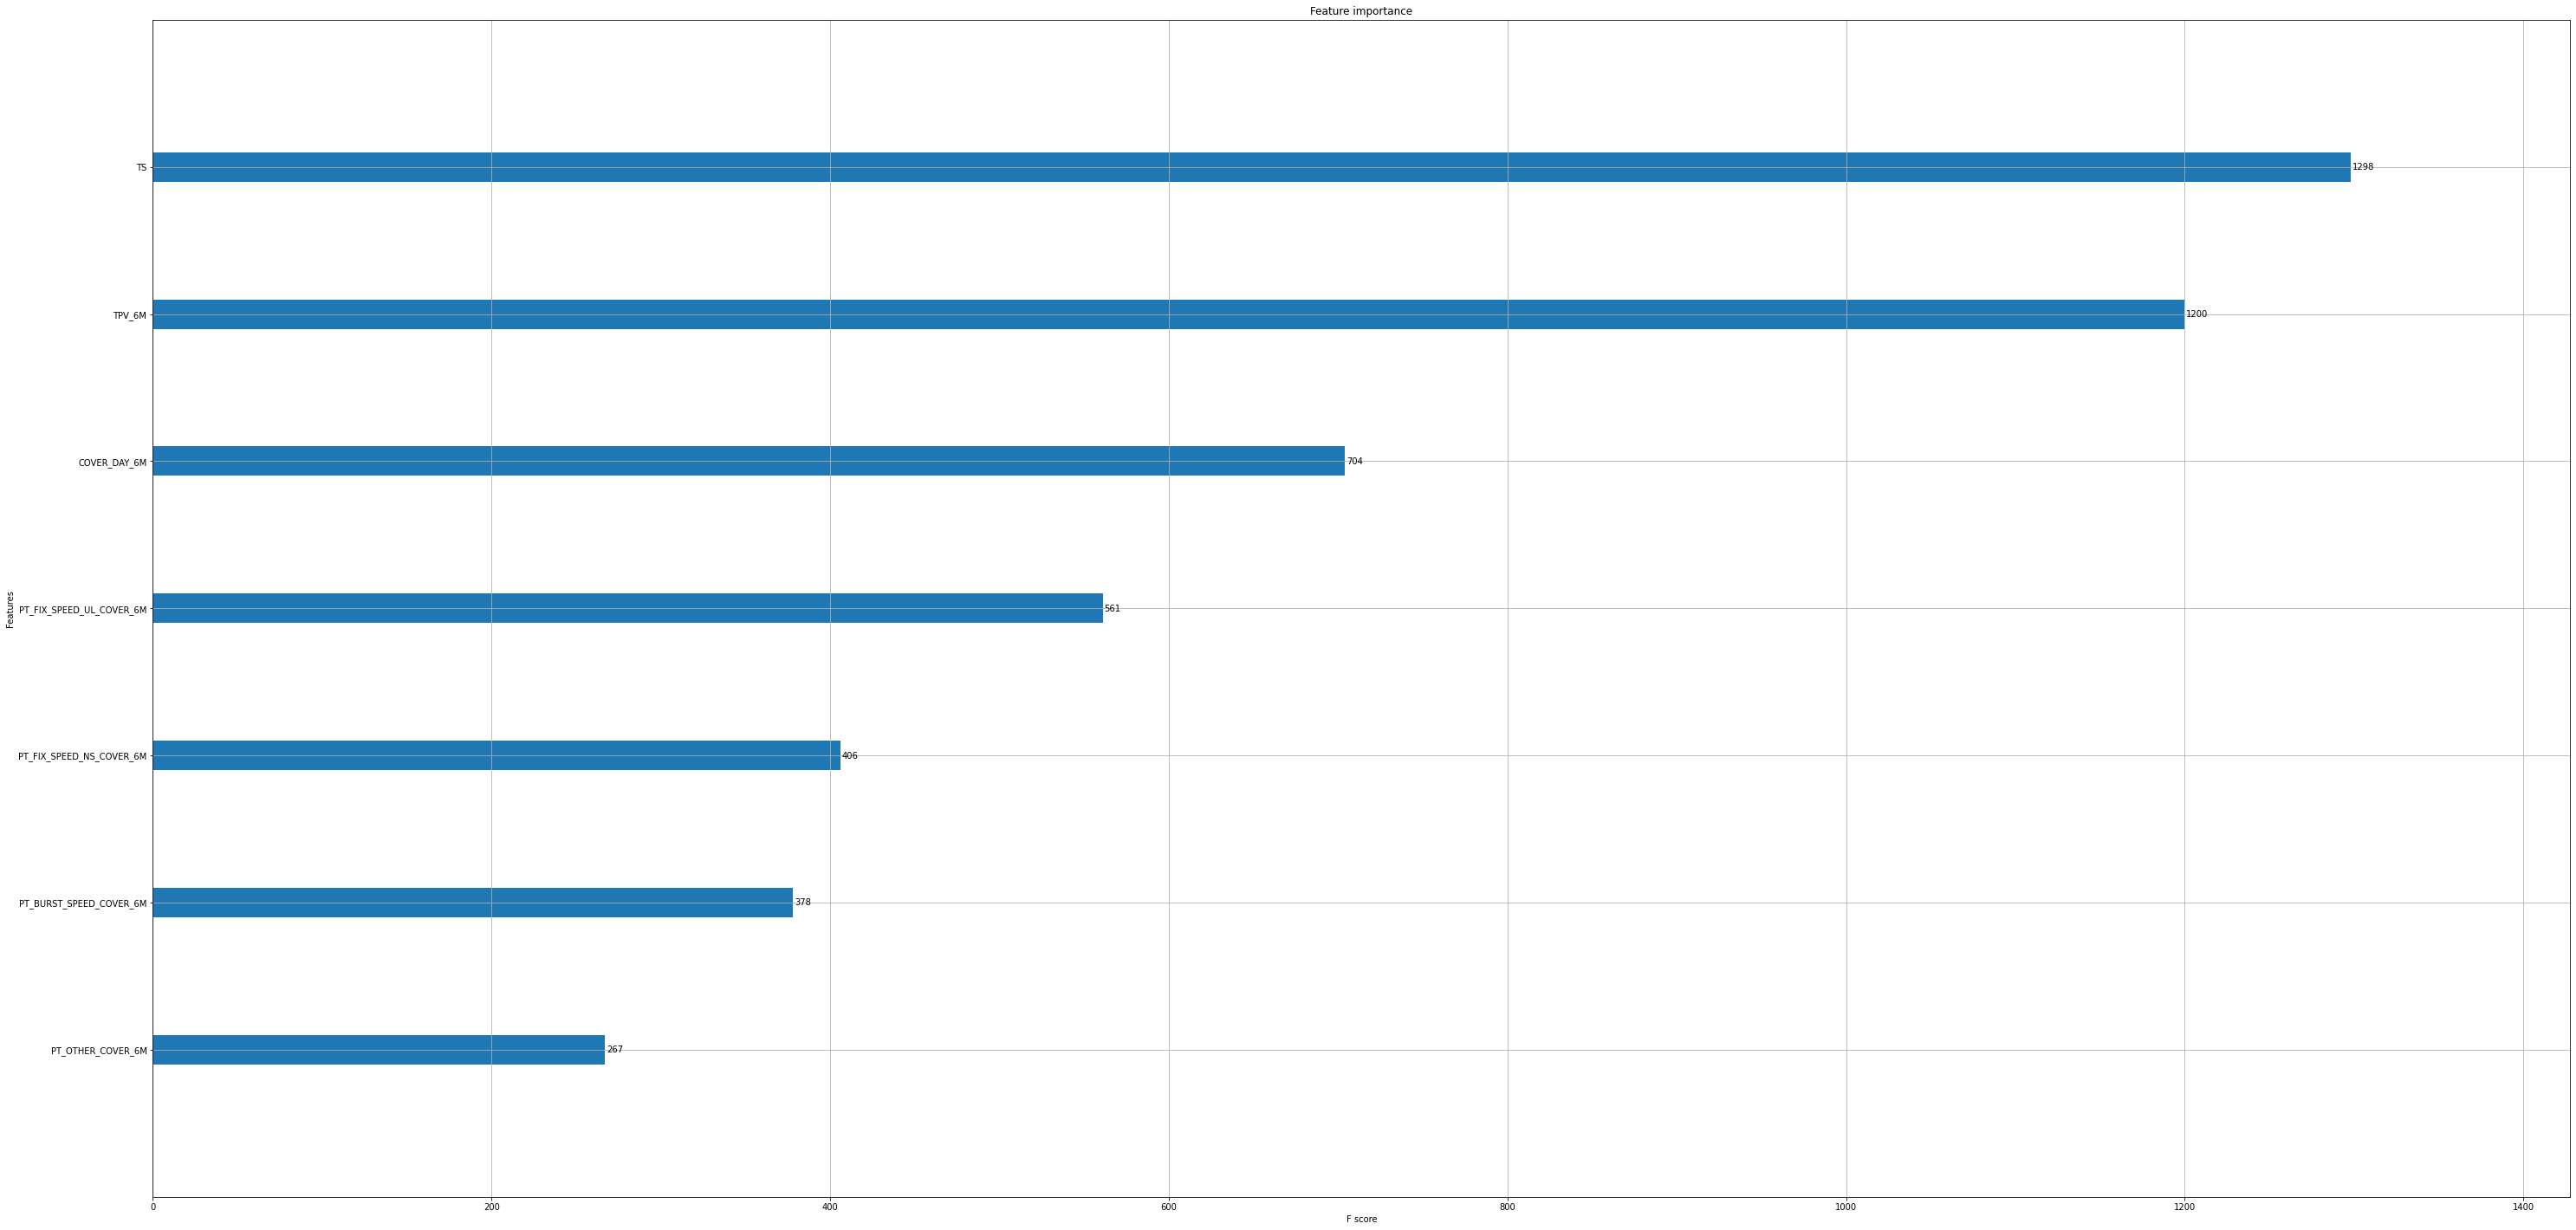

In [560]:
xgb.plot_importance(model)